# Analiza sprzedaży / Sales analysis

**Autor / Author:** Adrian Schmidt 

**Data / Date:** 2025-06-16

**Dane / Data Source:** SampleSales.csv from Kaggle ([link](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data))

## Cel projektu / Project Goal
Za pomocą analizy zamierzam zweryfikować:
- którzy klienci oraz produkty przynoszą najwyższe wpływy,
- które kraje odpowiedzialne są za najlepsze wyniki,
- czy pora roku ma wpływ na sprzedaż

Projekt tworzę jako element portfolio analityka danych. Przypinam do niego podejście biznesowe — realizuję go etapami, z objaśnieniem każdego działania, dla pełnej czytelności wniosków.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

In this analysis, I will check:
- which customers and products give the most revenue,
- which countries have the best performance,
- does the season affect sales

I’m doing this project as part of my data analyst portfolio. I treat it like a business task—I work step by step and explain each action so the conclusions are clear.

## Import bibliotek
W tej sekcji importuje potrzebne biblioteki w celu realizacji analizy

In [268]:
import pandas as pd
import datetime #jeśli będzie potrzebne
import seaborn as sns
import matplotlib.pyplot as plt

## Wczytanie danych
W tej sekcji wczytuję dane, sprawdzam ich zawartość, itd itd !! - WRÓĆ tu 

In [269]:
df = pd.read_csv('../data/sales_data_sample.csv', encoding='cp1250')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [270]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.0,10258.725115,92.085478,10100.00,10180.00,10262.0,10333.5,10425.0
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
ORDERLINENUMBER,2823.0,6.466171,4.225841,1.00,3.00,6.0,9.0,18.0
SALES,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
QTR_ID,2823.0,2.717676,1.203878,1.00,2.00,3.0,4.0,4.0
MONTH_ID,2823.0,7.092455,3.656633,1.00,4.00,8.0,11.0,12.0
YEAR_ID,2823.0,2003.815090,0.699670,2003.00,2003.00,2004.0,2004.0,2005.0
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [272]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [273]:
df[['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY']].head(25)

,ADDRESSLINE2,STATE,POSTALCODE,TERRITORY
0,NaN,NY,10022,NaN
1,NaN,NaN,51100,EMEA
2,NaN,NaN,75508,EMEA
3,NaN,CA,90003,NaN
4,NaN,CA,NaN,NaN
5,NaN,CA,94217,NaN
6,NaN,NaN,59000,EMEA
7,NaN,NaN,N 5804,EMEA
8,NaN,CA,NaN,NaN
9,NaN,NaN,75016,EMEA


## Czyszczenie danych
Kolumny ADDRESSLINE2, STATE, POSTALCODE, TERRITORY zawierają dużo braków, dlatego zdecydowałem się je usunąć. Kolumny te nie wnoszą wartości do analizy globalnej tj. po Kraju. Pozostałe kolumny nie posiadają braków.

In [274]:
df = df.drop(columns=['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY'])
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium


In [275]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

## Przygotowanie kolumny ORDERDATE pod prawidłowy format datetim oraz stworzenie klumn MONTH i QUARTER

In [276]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%Y %H:%M', errors='coerce')
df['ORDERDATE']

0      2003-02-24
1      2003-05-07
2      2003-07-01
3      2003-08-25
4      2003-10-10
          ...    
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDERDATE, Length: 2823, dtype: datetime64[ns]

In [277]:
df['MONTH'] = df['ORDERDATE'].dt.month_name()
df['MONTH']


0       February
1            May
2           July
3         August
4        October
          ...   
2818    December
2819     January
2820       March
2821       March
2822         May
Name: MONTH, Length: 2823, dtype: object

In [278]:
df['QUARTER'] = 'Q' + df['ORDERDATE'].dt.quarter.astype(str)
df['QUARTER']

0       Q1
1       Q2
2       Q3
3       Q3
4       Q4
        ..
2818    Q4
2819    Q1
2820    Q1
2821    Q1
2822    Q2
Name: QUARTER, Length: 2823, dtype: object

Aby utworzyć kolumnę SEASON, wymagane jest stworzenie funkcji. Funkcja ta na podstawie warunków dopisze aktualny sezon do każdego zamówienia

In [279]:
def get_season(month_id):
    
    if month_id in [12,1,2]:
        return 'Winter'
    elif month_id in [3,4,5]:
        return 'Spring'
    elif month_id in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

In [280]:
df['SEASON'] = df['ORDERDATE'].dt.month.apply(get_season)
df['SEASON']

0       Winter
1       Spring
2       Summer
3       Summer
4       Autumn
         ...  
2818    Winter
2819    Winter
2820    Spring
2821    Spring
2822    Spring
Name: SEASON, Length: 2823, dtype: object

## Analiza właściwa

Analizy będą wykonywanie zgodnie z opisanymi we wstępie celami


In [281]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,MONTH,QUARTER,SEASON
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small,February,Q1,Winter
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small,May,Q2,Spring
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium,July,Q3,Summer
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium,August,Q3,Summer
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium,October,Q4,Autumn


Nowa tabela o nazwie *df_revenue_per_customer* sumująca całkowity dochód na jednego klienta:

In [282]:
df_revenue_per_customer = df.groupby('CUSTOMERNAME')['SALES'].sum().reset_index()
df_revenue_per_customer = df_revenue_per_customer.rename (columns= {'CUSTOMERNAME':'CUSTOMER_NAME', 'SALES':'TOTAL_REVENUE'})
df_revenue_per_customer = df_revenue_per_customer.sort_values('TOTAL_REVENUE', ascending=False)
df_revenue_per_customer.head()

,CUSTOMER_NAME,TOTAL_REVENUE
33,Euro Shopping Channel,912294.11
55,Mini Gifts Distributors Ltd.,654858.06
6,"Australian Collectors, Co.",200995.41
58,Muscle Machine Inc,197736.94
44,La Rochelle Gifts,180124.90


Nowa tabela o nazwie *df_count_order_per_customer* sumująca całkowite zamówienia na jednego klienta:

In [283]:
df_count_order_per_customer = df.groupby('CUSTOMERNAME')['QUANTITYORDERED'].sum().reset_index()
df_count_order_per_customer = df_count_order_per_customer.rename(columns={'CUSTOMERNAME': 'CUSTOMER_NAME', 'QUANTITYORDERED': 'TOTAL_ORDER_COUNT'})
df_count_order_per_customer = df_count_order_per_customer.sort_values('TOTAL_ORDER_COUNT', ascending=False)
df_count_order_per_customer.head()

,CUSTOMER_NAME,TOTAL_ORDER_COUNT
33,Euro Shopping Channel,9327
55,Mini Gifts Distributors Ltd.,6366
6,"Australian Collectors, Co.",1926
44,La Rochelle Gifts,1832
0,"AV Stores, Co.",1778


# Wykres przedstawiający TOP 5 klientów pod względem łącznego dochodu

C:\Users\adria\AppData\Local\Temp\ipykernel_33760\2412753194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df_revenue_per_customer.head(5), x='CUSTOMER_NAME', y='TOTAL_REVENUE', palette='Set1')


<function matplotlib.pyplot.show(close=None, block=None)>

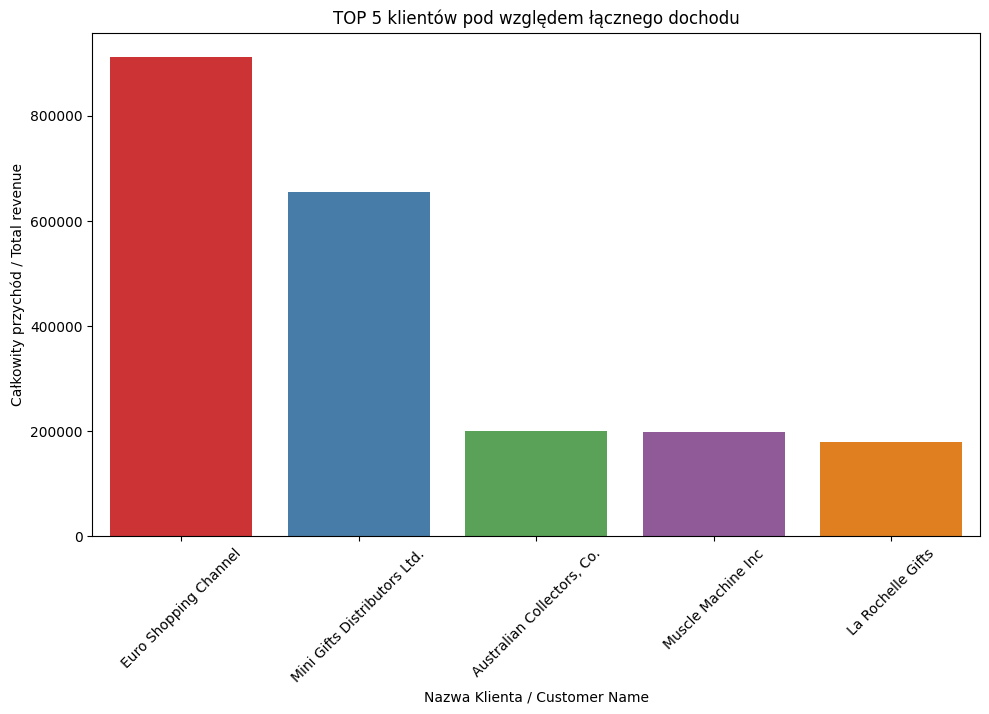

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data= df_revenue_per_customer.head(5), x='CUSTOMER_NAME', y='TOTAL_REVENUE', palette='Set1')
plt.title('TOP 5 klientów pod względem łącznego dochodu')
plt.xlabel('Nazwa Klienta / Customer Name')
plt.ylabel('Całkowity przychód / Total revenue')
plt.tight_layout()
plt.xticks(rotation= 45)
plt.show()

# Identyfikacja. 
Czy 20% klientów daje 80% sprzedaży?

In [285]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE', 'MONTH', 'QUARTER', 'SEASON'],
      dtype='object')

W pierwszej kolejności należy obliczyć procentowy udział w sprzedaży

In [289]:
total_sales = df['SALES'].sum()
df_revenue_per_customer['PCT_REVENUE'] = round(df_revenue_per_customer['TOTAL_REVENUE'] / total_sales, 4) * 100
df_revenue_per_customer.head()

,CUSTOMER_NAME,TOTAL_REVENUE,PCT_REVENUE
33,Euro Shopping Channel,912294.11,9.09
55,Mini Gifts Distributors Ltd.,654858.06,6.53
6,"Australian Collectors, Co.",200995.41,2.00
58,Muscle Machine Inc,197736.94,1.97
44,La Rochelle Gifts,180124.90,1.80


Następnie należy zweryfikować kumulację udziału w sprzedaży dzięki funkcji .cumsum()

In [296]:
df_revenue_per_customer['CUM_PCT'] = df_revenue_per_customer['PCT_REVENUE'].cumsum()
df_revenue_per_customer.head(25)

,CUSTOMER_NAME,TOTAL_REVENUE,PCT_REVENUE,CUM_PCT
33,Euro Shopping Channel,912294.11,9.09,9.09
55,Mini Gifts Distributors Ltd.,654858.06,6.53,15.62
6,"Australian Collectors, Co.",200995.41,2.00,17.62
58,Muscle Machine Inc,197736.94,1.97,19.59
44,La Rochelle Gifts,180124.90,1.80,21.39
31,"Dragon Souveniers, Ltd.",172989.68,1.72,23.11
45,Land of Toys Inc.,164069.44,1.64,24.75
81,The Sharp Gifts Warehouse,160010.27,1.59,26.34
0,"AV Stores, Co.",157807.81,1.57,27.91
3,"Anna's Decorations, Ltd",153996.13,1.53,29.44


W ostatnim kroku należy utworzyć nową tabelę z klientami, którzy przynoszą 80% dochodów i odpowiedzieć na pytanie czy ta grupa wynosi 20%

In [299]:
df_20_PCT = df_revenue_per_customer[df_revenue_per_customer['CUM_PCT'] <= 80]
df_20_PCT.count()

CUSTOMER_NAME    56
TOTAL_REVENUE    56
PCT_REVENUE      56
CUM_PCT          56
dtype: int64

In [300]:
df_revenue_per_customer.count()

CUSTOMER_NAME    92
TOTAL_REVENUE    92
PCT_REVENUE      92
CUM_PCT          92
dtype: int64

In [304]:
finaly_result =round((df_20_PCT.count() / df_revenue_per_customer.count() * 100 )) 
print(finaly_result)

CUSTOMER_NAME    61.0
TOTAL_REVENUE    61.0
PCT_REVENUE      61.0
CUM_PCT          61.0
dtype: float64


# Wniosek:
*Podczas analizy nie potwierdzono zasady Pareto. 61% klientów generuje 80% sprzedaży, co powoduje większą zależność od szerokiej bazy klientów. Propozycja stworzenia programu lojalnościowego w celu utworzenia 20% klientów VIP*